In [2]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [26]:
landmark_frame = pd.read_csv('pytorch-Learning/data/faces/face_landmarks.csv')
n = 65
image_name = landmark_frame.iloc[n, 0]
landmarks = landmark_frame.iloc[n, 1:].as_matrix()  # 转换为ndarray
print('before reshape:',landmarks.shape)
landmarks = landmarks.astype('float').reshape(-1, 2)
print('after reshape:',landmarks.shape)

print('Image name: {}'.format(image_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

before reshape: (136,)
after reshape: (68, 2)
Image name: person-7.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]]


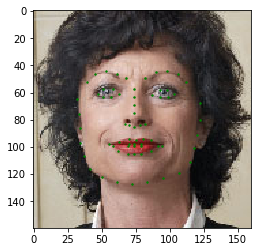

In [40]:
def show_landmarks(image, landmarks):
    '''
    打印图片，附带标点
    :param image: 
    :param landmarks: 
    :return: 
    '''
    plt.imshow(image)
    plt.scatter(landmarks[:,0], landmarks[:, 1],s=8, marker='.', c='g')
    plt.pause(0.001)
    
plt.figure()
show_landmarks(io.imread(os.path.join('pytorch-Learning/data/faces/', image_name)),
               landmarks)
plt.show()

# 图片预处理：转换
- 缩放，使所有图片的像素一致 		rescale()
- 随机裁剪，一种增强(augment)方法	    randomCrop()
- numpy转换为tensor格式（需交换横纵坐标）    toTensor()

In [56]:
a = torch.randn(10, 3, 4)
print(a.shape)
c, d = a.shape[:2]
print(c, d)

torch.Size([10, 3, 4])
10 3
